In [43]:
import pandas as pd


In [44]:
df_tongiao = pd.read_excel('DuLieuThucHanh.xlsx', sheet_name='TONGIAO', header=None)
df_dantoc = pd.read_excel('DuLieuThucHanh.xlsx', sheet_name='DANTOC', header=None)
df_thongtincanhan = pd.read_excel('DuLieuThucHanh.xlsx', sheet_name='THONGTINCANHAN')
df_thongtintuvong = pd.read_excel('DuLieuThucHanh.xlsx', sheet_name='THONGTINTUVONG')


# Test cases

- Kiểm tra số lượng người theo các địa điểm tử vong
- Thống kê số lượng người theo các nguyên nhân tử vong
- Thống kê số lượng người tử vong theo từng dân tộc -> Kết luận dân tộc nào có số lượng người tử vong nhiều nhất
- Nam /Nữ. Giới tính nào có số lượng người tử vong nhiều hơn ?

## Kiểm tra số lượng người theo các địa điểm tử vong 


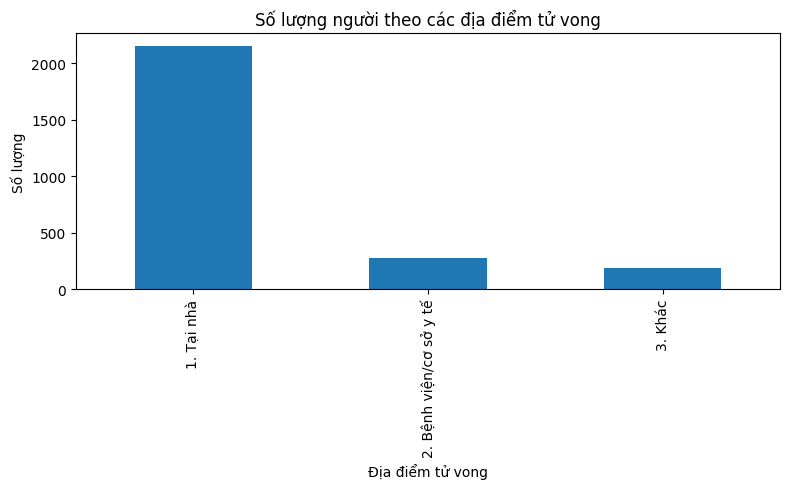

In [45]:
import matplotlib.pyplot as plt

# Group by "Địa điểm tử vong" and count occurrences
death_place_counts = df_thongtintuvong['Địa điểm tử vong'].value_counts()

# Plot bar chart
death_place_counts.plot(kind='bar', figsize=(8, 5))
plt.xlabel('Địa điểm tử vong')
plt.ylabel('Số lượng')
plt.title('Số lượng người theo các địa điểm tử vong')
plt.tight_layout()
plt.show()



In [46]:
import pandas as pd

# Convert the Series to a DataFrame for better display as a table
death_place_table = death_place_counts.reset_index()
death_place_table.columns = ['Địa điểm tử vong', 'Số lượng']
display(death_place_table)

,Địa điểm tử vong,Số lượng
0,1. Tại nhà,2155
1,2. Bệnh viện/cơ sở y tế,277
2,3. Khác,191


## Thống kê số lượng người theo các nguyên nhân tử vong

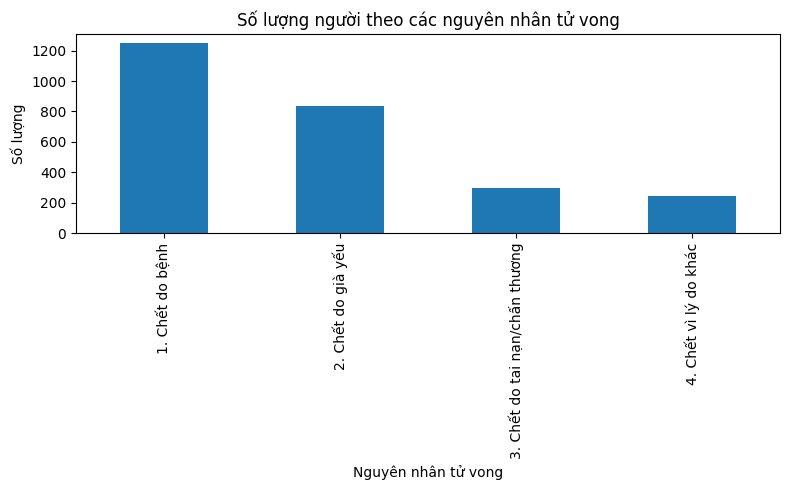

,Nguyên nhân tử vong,Số lượng
0,1. Chết do bệnh,1248
1,2. Chết do già yếu,835
2,3. Chết do tai nạn/chấn thương,297
3,4. Chết vì lý do khác,243


In [47]:
# Group by "Nguyên nhân tử vong" and count occurrences
cause_counts = df_thongtintuvong['Nguyên nhân tử vong'].value_counts()

# Plot bar chart
cause_counts.plot(kind='bar', figsize=(8, 5))
plt.xlabel('Nguyên nhân tử vong')
plt.ylabel('Số lượng')
plt.title('Số lượng người theo các nguyên nhân tử vong')
plt.tight_layout()
plt.show()

# Convert to DataFrame for display
cause_table = cause_counts.reset_index()
cause_table.columns = ['Nguyên nhân tử vong', 'Số lượng']
display(cause_table)

## Thống kê số lượng người tử vong theo từng dân tộc

In [48]:
# Join df_thongtintuvong with df_thongtincanhan on "MÃ" (df_thongtintuvong) and "Mã" (df_thongtincanhan)
df_tuvong_full = df_thongtintuvong.merge(df_thongtincanhan, left_on='MÃ', right_on='Mã', how='left')
df_tuvong_full.count()
# I only want to keep the rows has "Nguyên nhân tử vong"
df_tuvong_full = df_tuvong_full[df_tuvong_full['Nguyên nhân tử vong'].notnull()]
df_tuvong_selected = df_tuvong_full[['Dân tộc', 'Tôn giáo', 'Giới tính_x']]
display(df_tuvong_selected.dropna())

,Dân tộc,Tôn giáo,Giới tính_x
0,1. Không,1. Không,2
1,1. Không,1. Không,2
2,1. Không,1. Không,2
4,1. Không,1. Không,2
5,1. Không,1. Không,2
...,...,...,...
7145,1. Không,1. Không,1
7146,1. Không,1. Không,1
7147,1. Không,1. Không,1
7148,1. Không,1. Không,1


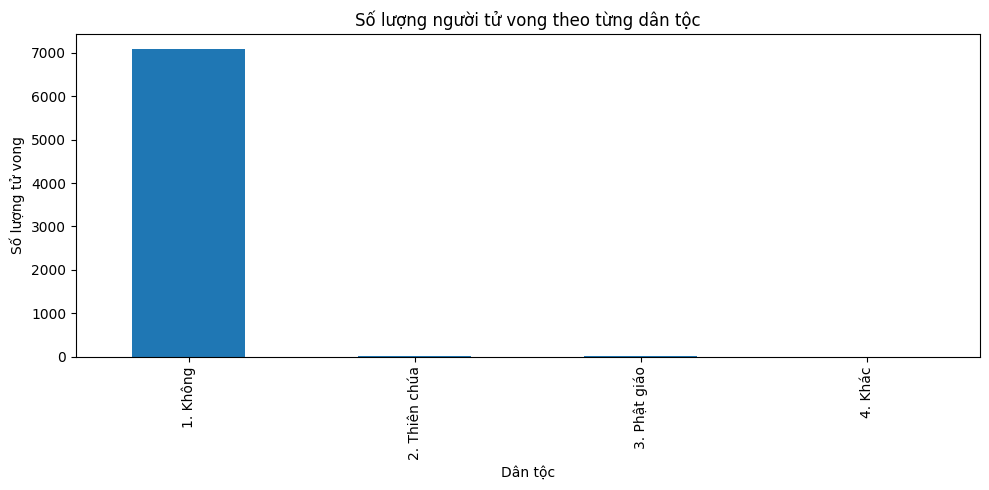

,Dân tộc,Số lượng tử vong
0,1. Không,7084
1,2. Thiên chúa,13
2,3. Phật giáo,11
3,4. Khác,4


In [49]:
# Group by "Dân tộc" and count the number of deaths for each group
ethnic_counts = df_tuvong_selected['Dân tộc'].value_counts().dropna()
ethnic_counts

# Plot bar chart
ethnic_counts.plot(kind='bar', figsize=(10, 5))
plt.xlabel('Dân tộc')
plt.ylabel('Số lượng tử vong')
plt.title('Số lượng người tử vong theo từng dân tộc')
plt.tight_layout()
plt.show()

# Convert to DataFrame for display as table
ethnic_table = ethnic_counts.reset_index()
ethnic_table.columns = ['Dân tộc', 'Số lượng tử vong']
display(ethnic_table)

## Thống kê số lượng người tử vong theo từng tôn giáo

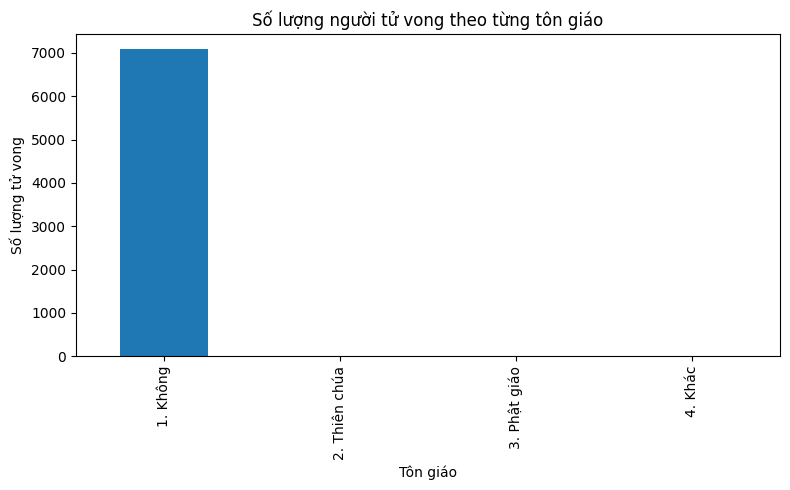

,Tôn giáo,Số lượng tử vong
0,1. Không,7084
1,2. Thiên chúa,13
2,3. Phật giáo,11
3,4. Khác,4


In [50]:
# Group by "Tôn giáo" and count the number of deaths for each group
religion_counts = df_tuvong_selected['Tôn giáo'].value_counts().dropna()

# Plot bar chart
religion_counts.plot(kind='bar', figsize=(8, 5))
plt.xlabel('Tôn giáo')
plt.ylabel('Số lượng tử vong')
plt.title('Số lượng người tử vong theo từng tôn giáo')
plt.tight_layout()
plt.show()

# Convert to DataFrame for display as table
religion_table = religion_counts.reset_index()
religion_table.columns = ['Tôn giáo', 'Số lượng tử vong']
display(religion_table)

## Nam /Nữ. Giới tính nào có số lượng người tử vong nhiều hơn ?

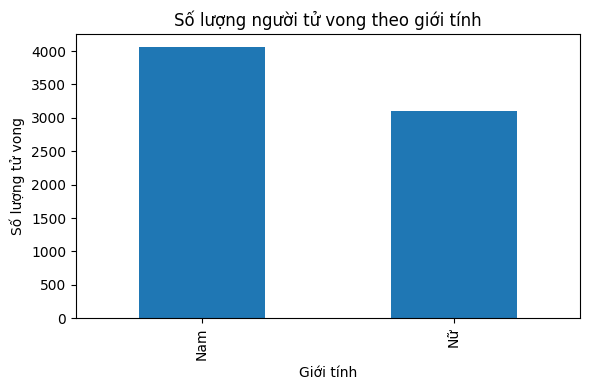

,Giới tính,Số lượng tử vong
0,Nam,4055
1,Nữ,3095


In [51]:
# Group by "Giới tính_x" and count the number of deaths for each group
gender_counts = df_tuvong_selected['Giới tính_x'].value_counts().sort_index()

# Map numeric gender to labels if needed (1: Nam, 2: Nữ)
gender_labels = {1: 'Nam', 2: 'Nữ'}
gender_counts.index = gender_counts.index.map(gender_labels)

# Plot bar chart
gender_counts.plot(kind='bar', figsize=(6, 4))
plt.xlabel('Giới tính')
plt.ylabel('Số lượng tử vong')
plt.title('Số lượng người tử vong theo giới tính')
plt.tight_layout()
plt.show()

# Convert to DataFrame for display as table
gender_table = gender_counts.reset_index()
gender_table.columns = ['Giới tính', 'Số lượng tử vong']
display(gender_table)